# Grade: 100 points

# Assignment 01: Linear Regression

## Instructions

#### Follow These Steps before submitting your assignment 

1. Complete the notebook.

2. Make sure all plots have axis labels.

3. Once the notebook is complete, `Restart` your kernel by clicking 'Kernel' > 'Restart & Run All'.

4. Fix any errors until your notebook runs without any problems.

5. Submit one completed notebook for the group to OWL by the deadline.

6. Please note, a random seed of 42 needs to be set to ensure the reproducability of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

7. Make sure to reference all external code and documentation used.


# Q1 - Data Loading and Exploration

`Dataset_Assignment1.csv` lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:

Age: Player age in years

Nationality: Players nationality

Overall: Player overall performance score (higher better)

Potential: Player potential score (higher better)

Club: Player home soccer club

Value: Player value i.e, the amount of money a club should pay in order to purchase the player (higher better)

Wage: Player stipend (higher better)

Preferred Foot: Player preferred foot to play

International Reputation: Player international fame (higher better)

Week Foot: Performance score of player weak foot (higher better)

Skill Moves: Player move skill score (higher better)

Body Type: Player body type

Position: Position player holds on the pitch

Height: Player height in CM

Weight: Player weight in kg

1. Load the dataset.
2. Display basic statistics and inspect for missing data.
3. Visualize the distribution of numerical columns.
4. **Discussion Question:** Why is it important to explore and visualize the data before building any models? What types of trends or problems could you uncover at this stage?

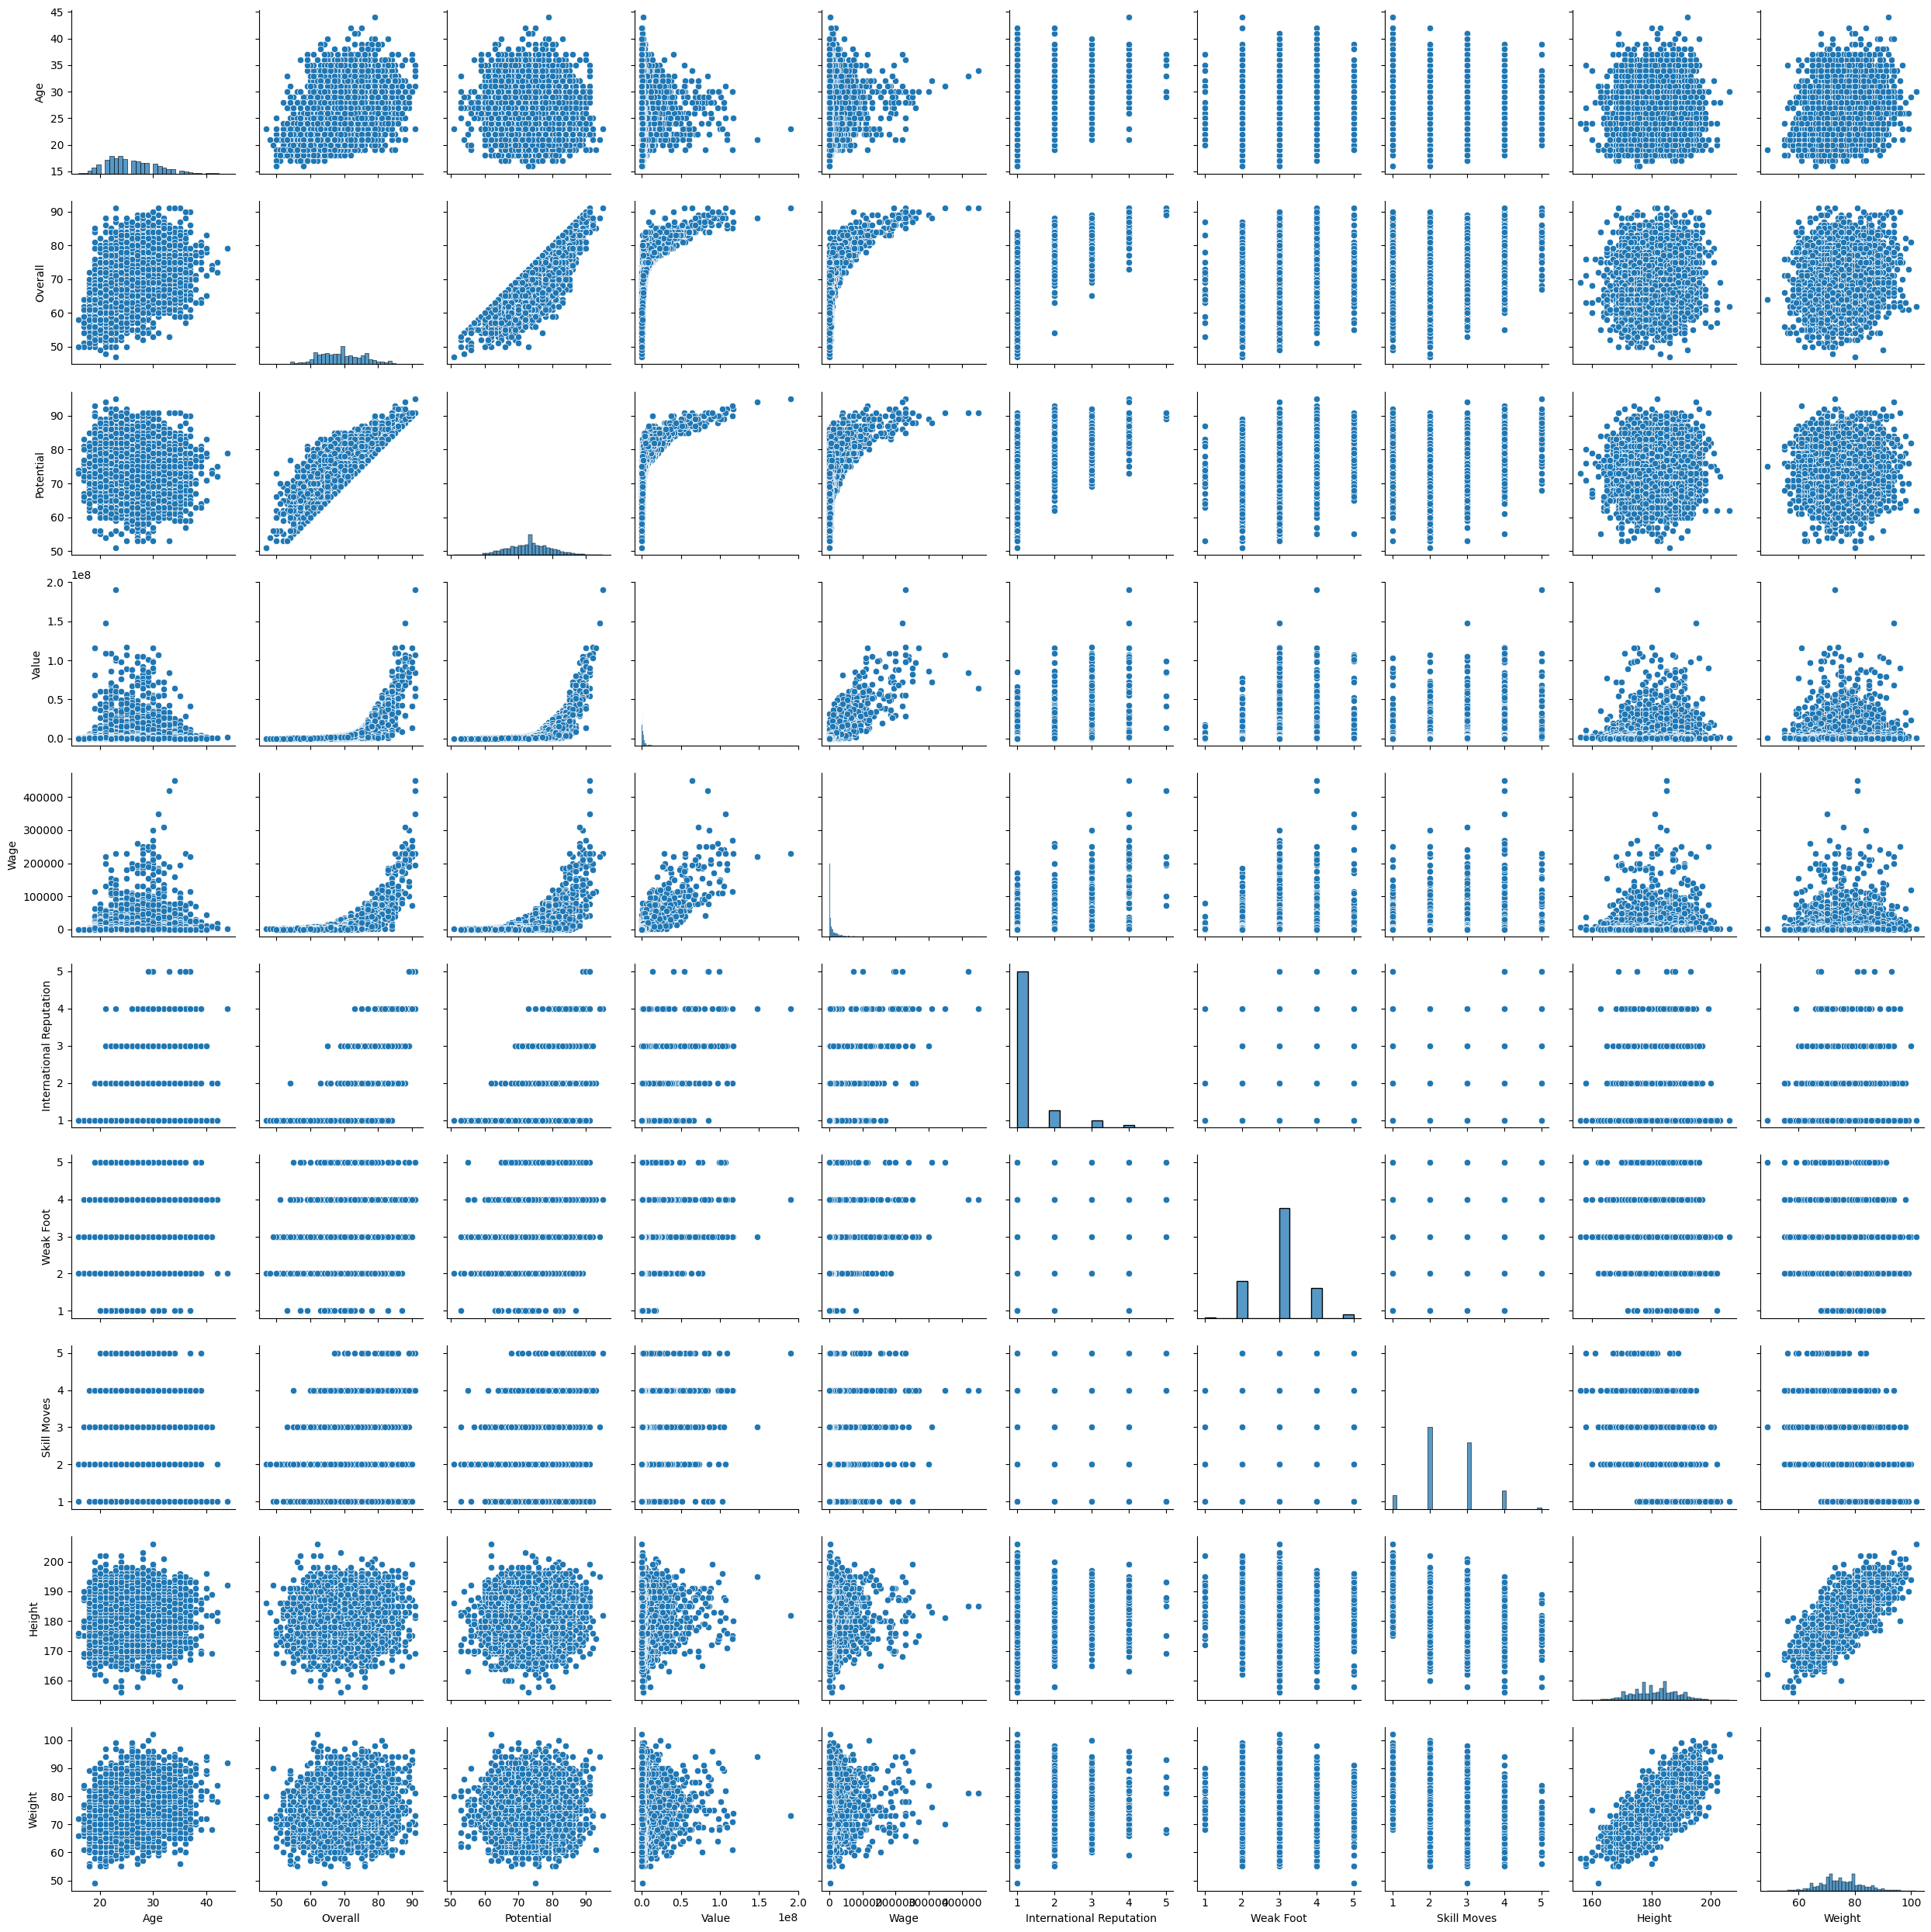

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./resources/Dataset_Assignment1.csv')

cols = ['Age', 'Overall', 'Potential',
        'Value', 'Wage', 'International Reputation',
        'Weak Foot', 'Skill Moves', 'Height', 'Weight']

df = df[cols]

df.head()

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()


**Answer to 4**: Through exploring and visualizing the data, we can see the different correlations between features and understand what each feature is.

# Q2 - Feature extraction

1. Plot the joint distribution between `Weight` and `Height`.
2. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height. 

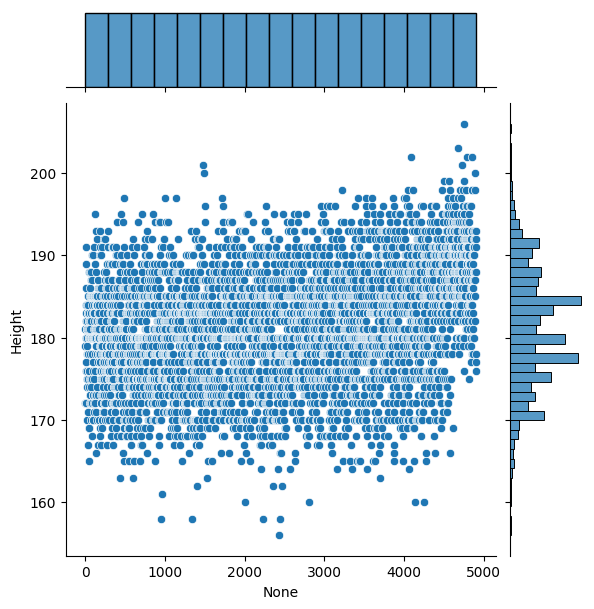

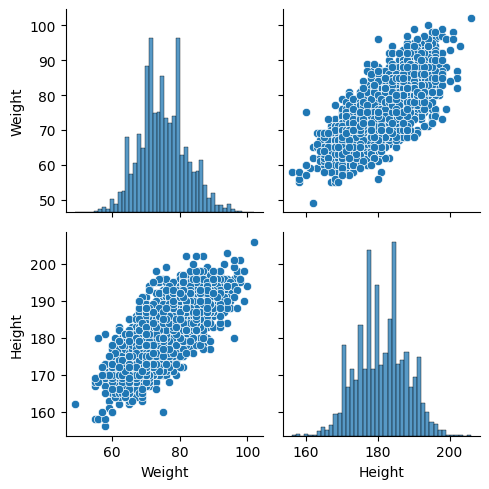

In [70]:
target_cols = ["Weight", "Height"]

sns.jointplot(df["Height"])

sns.pairplot(df[target_cols], height=2.5)
plt.tight_layout()
plt.show()

In [80]:
df["BMI"] = df.apply(lambda row: row.Weight/(row.Height * row.Height) * 10000, axis=1)

df = df.drop(columns=["Height","Weight"])

df.head()

cols = df.columns.values


['Age' 'Overall' 'Potential' 'Value' 'Wage' 'International Reputation'
 'Weak Foot' 'Skill Moves' 'BMI']


# Q3 - Correlation and Feature Selection

1. Compute correlation between numerical features.
2. Visualize correlations using a heatmap to identify highly correlated features.
3. Choose the most correlated feature with the target variable (`Value`) for simple linear regression.
4. **Discussion Question:** How do you interpret a correlation value? Does a higher correlation always mean a feature is more important?

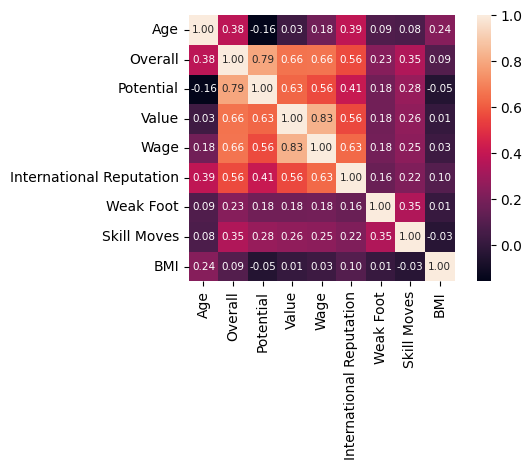

In [81]:
import numpy as np

correlations = np.corrcoef(df[cols].values.T)

heat_map = sns.heatmap(correlations,
                        cbar=True,
                        annot=True,
                        square=True,
                        fmt='.2f',
                        annot_kws={'size': 7.5},
                        yticklabels=cols,
                        xticklabels=cols)
plt.tight_layout()
plt.show()

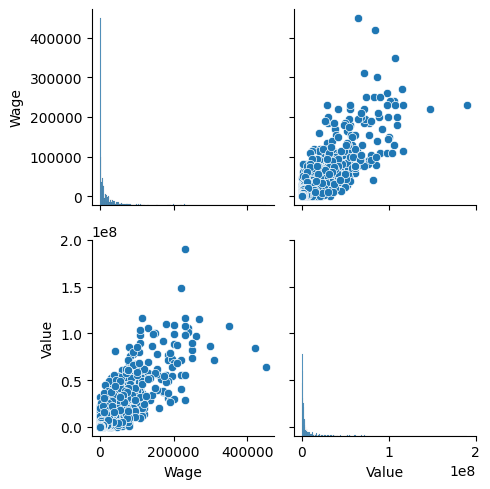

In [73]:
# Wage and Value have a 83% correlation, which is the highest correlation
target_cols = ["Wage", "Value"]

sns.pairplot(df[target_cols], height=2.5)
plt.tight_layout()
plt.show()

**Answer to 4**: Based on the correlation, there is a high relation between value and wage, where on average, the higher the wage, the higher the value. Also, there is a high positive correlation between Overall and Potential. However, higher correlation does not necessary mean a feature is more important because the importance is dependant on the target of the prediction. For example, value and wage has a high positive correlation, but it doesn't give us any meaningful information about the data. 

# Q4 - Data Normalization & Simple Linear Regression

1. Select one highly correlated numerical feature and build a simple linear regression model to predict the target variable.
2. Split the data into 80% training and 20% test sets (use the random seed of 42). 
3. Normalize the dataset.
4. Rebuild the simple linear regression model with normalized data.
5. Compare the normalized and non-normalized data visually. 
6. Compare performance of the normalized and non-normalized models visually and using R² and RMSE.
7. **Discussion Question:** Why might normalizing data improve model performance? In which situations might normalization not be beneficial?
8. Visualize the relationship between the selected feature and the predicted target variable.
9. **Discussion Question:** What could cause a simple linear regression model to perform poorly, even if the correlation is high?

R2: 0.6093282093755401
 RMSE: 8023506.577362569


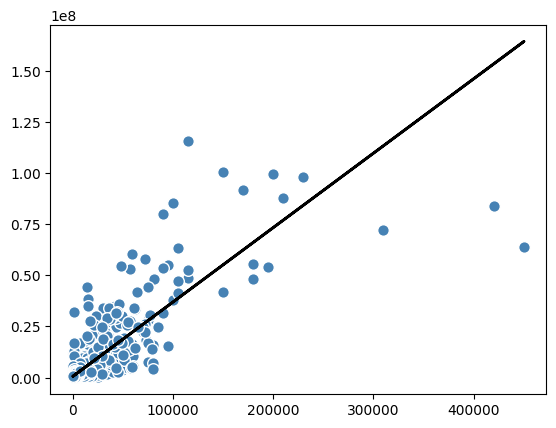

R2: 0.609328209375539
 RMSE: 8023506.57736258


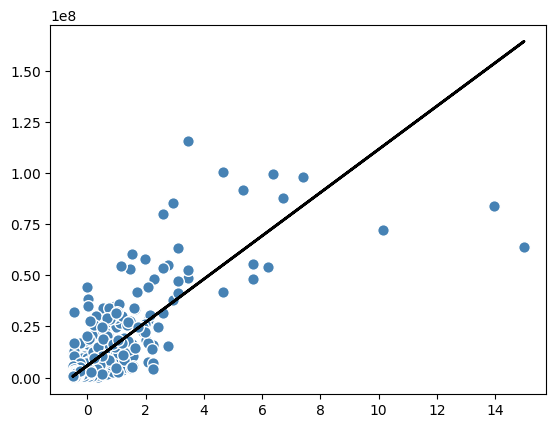

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

RANDOM_SEED = 42

X = df[["Wage"]].values
y = df["Value"].values


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)


model_non = LinearRegression()

model_non.fit(X_train, y_train)

y_test_non_pred = model_non.predict(X_test)

print(f"R2: {r2_score(y_test, y_test_non_pred)}\n RMSE: {root_mean_squared_error(y_test, y_test_non_pred)}")


plt.scatter(X_test, y_test, c='steelblue', edgecolor='white', s=70)
plt.plot(X_test, model_non.predict(X_test), color='black', lw=2)
plt.show()  


sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

model = LinearRegression()

model.fit(X_train_std, y_train)

y_test_pred = model.predict(X_test_std)

print(f"R2: {r2_score(y_test, y_test_pred)}\n RMSE: {root_mean_squared_error(y_test, y_test_pred)}")

plt.scatter(X_test_std, y_test, c='steelblue', edgecolor='white', s=70)
plt.plot(X_test_std, model.predict(X_test_std), color='black', lw=2)
plt.show()  

**Answer to 7**: 

**Answer to 9**: 

# Q 5 - Multiple Linear Regression

1. Select numerical features with correlation above certain thresholds (e.g., 0.3, 0.6, and 0.8).
2. Build three different multiple linear regression models using different sets of features based on correlation thresholds.
3. Evaluate and compare these models using R² and RMSE.
4. **Discussion Question:** How do we decide which features to include in a multiple linear regression model? What challenges might arise from using too many features?

In [91]:
LOW_THRESHOLDS = 0.3
MID_THRESHOLDS = 0.6
HIGH_THRESHOLDS = 0.8

correlation = df.corr()


# Assume the correlation threshold is above 0.6 and is with respect to the Value column

X2 = df[["Wage","Potential", "Overall"]].values
y2 = df["Value"].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_std, y_train)

y_test_pred2 = model2.predict(X_test_std)

print(f"R2: {r2_score(y_test2, y_test_pred2)}\n RMSE: {root_mean_squared_error(y_test2, y_test_pred2)}")

[[ 1.          0.37767506 -0.15699523  0.03478584  0.18134451  0.38540023
   0.0860357   0.07797287  0.23564288]
 [ 0.37767506  1.          0.79399812  0.65882616  0.66213513  0.56355177
   0.23316459  0.34790082  0.09238156]
 [-0.15699523  0.79399812  1.          0.62682907  0.56333001  0.41182552
   0.18167568  0.27739074 -0.04652575]
 [ 0.03478584  0.65882616  0.62682907  1.          0.82505161  0.56106865
   0.18192778  0.25945051  0.00858262]
 [ 0.18134451  0.66213513  0.56333001  0.82505161  1.          0.63406702
   0.18380468  0.25358398  0.030509  ]
 [ 0.38540023  0.56355177  0.41182552  0.56106865  0.63406702  1.
   0.15718157  0.21776852  0.09993505]
 [ 0.0860357   0.23316459  0.18167568  0.18192778  0.18380468  0.15718157
   1.          0.34581727  0.01036981]
 [ 0.07797287  0.34790082  0.27739074  0.25945051  0.25358398  0.21776852
   0.34581727  1.         -0.03126656]
 [ 0.23564288  0.09238156 -0.04652575  0.00858262  0.030509    0.09993505
   0.01036981 -0.03126656  1. 

**Answer to 4**: 

# Q6 - Model Evaluation and Comparison

1. Compare all models (simple and multiple regression models) by printing there R² and RMSE values.
2. **Discussion Question:** Which model performs the best and why?
3. **Discussion Question:** If a model has a high R² value but a large RMSE, what might that indicate about the model's performance?
4. **Discussion Question:** Discuss next steps or potential improvements to the models.

In [76]:
print(f"R2: {r2_score(y_test, y_test_pred)}\n RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}")

print(f"R2: {r2_score(y_test2, y_test_pred2)}\n RMSE: {mean_squared_error(y_test2, y_test_pred2, squared=False)}")

R2: 0.6393075636278782
 RMSE: 4.191890243138072
R2: -0.2350142186972095
 RMSE: 14265735.42466053


c:\Users\pikak\CS\Courses\DS3000\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\pikak\CS\Courses\DS3000\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Answer to 2**: 

**Answer to 3**: 

**Answer to 4**: 